In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [17]:
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

if 'label' in test.columns:
    X_test = test.drop('label', axis=1).values
    y_test = test['label'].values
else:
    X_test = test.values
    y_test = None

In [19]:
X_train_images = X_train.reshape(-1, 28, 28)


In [21]:
# Flatten and normalize
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (42000, 784)
Flattened test data shape: (28000, 784)


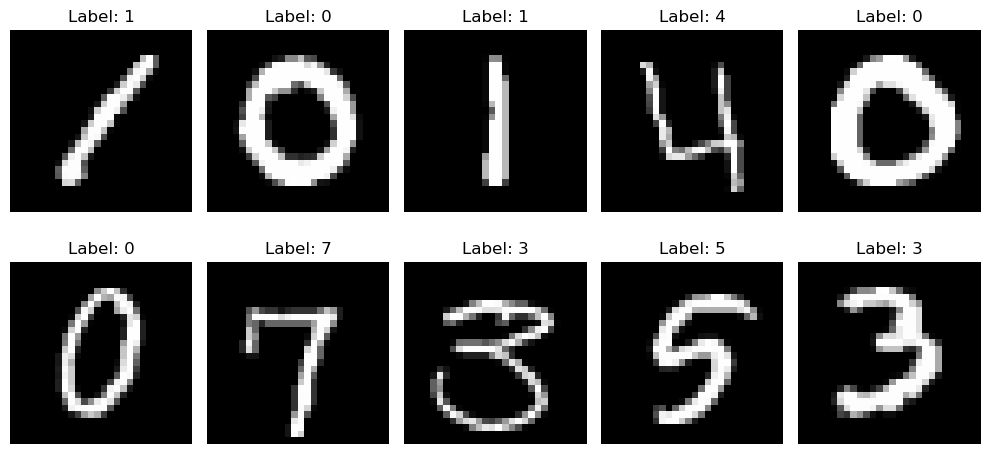

In [23]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (33600, 784)
Validation set shape: (8400, 784)


KNN Validation Accuracy: 0.9667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.95      1.00      0.97       909
           2       0.98      0.95      0.96       846
           3       0.97      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.95      0.97      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.97      0.96       893
           8       0.98      0.93      0.95       835
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



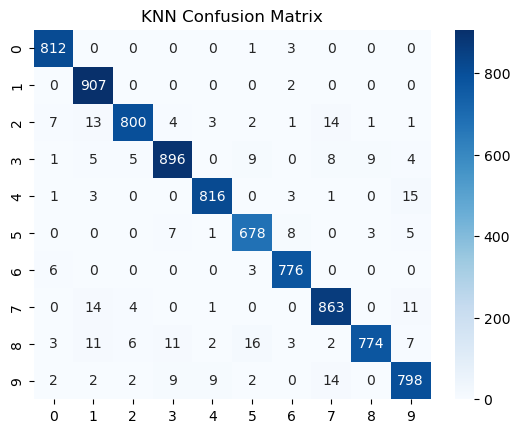

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

C:\Users\pavan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.8283 - loss: 0.5678 - val_accuracy: 0.7788 - val_loss: 0.6432
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9642 - loss: 0.1102 - val_accuracy: 0.9862 - val_loss: 0.0479
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9761 - loss: 0.0789 - val_accuracy: 0.9874 - val_loss: 0.0390
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9789 - loss: 0.0675 - val_accuracy: 0.9860 - val_loss: 0.0432
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9817 - loss: 0.0595 - val_accuracy: 0.9876 - val_loss: 0.0364
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9825 - loss: 0.0524 - val_accuracy: 0.9904 - val_loss: 0.0298
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9854 - loss: 0.0474 - val_accuracy: 0.9885 - val_loss: 0.0344
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9864 - loss: 0.0438 - 

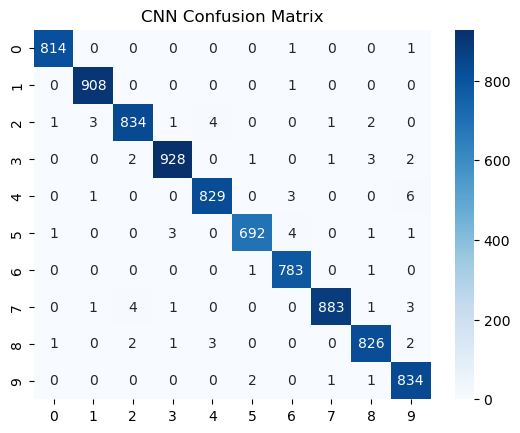

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load data from CSV files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Split data into features and labels
X_train = train.drop('label', axis=1).values / 255.0  # Normalize pixel values
y_train = train['label'].values

if 'label' in test.columns:
    X_test = test.drop('label', axis=1).values / 255.0  # Normalize test data
    y_test = test['label'].values
else:
    X_test = test.values / 255.0
    y_test = None

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels for training
y_train = to_categorical(y_train, 10)

# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=10,  # You can increase epochs for better performance
    batch_size=64,
    verbose=1
)

# Evaluate the model
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_accuracy:.4f}')



# Predict on the validation set
y_val_pred = cnn_model.predict(X_val).argmax(axis=1)
y_val_true = y_val.argmax(axis=1)

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred))

sns.heatmap(confusion_matrix(y_val_true, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()

In [47]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 27.1 MB/s eta 0:00:15
   ---------------------------------------- 1.5/390.3 MB 19.4 MB/s eta 0:00:21
   ---------------------------------------- 2.1/390.3 MB 19.2 MB/s eta 0:00:21
   ---------------------------------------- 2.9/390.3 MB 17.0 MB/s eta 0:00:23
   ---------------------------------------- 3.6/390.3 MB 16.5 MB/s eta 0:00:24
   ---------------------------------------- 4.3/390.3 MB 16.2 MB/s eta 0:00:24
    --------------------------------------- 5.0/390.3 MB 16.0 MB/s eta 0:00:25
    --------------------------------------- 5.7/390.3 MB 15.9 MB/s eta 0:00:25
    --------------------------------------- 6.4/390.3 MB 15.8 MB/s eta 0:00:25
    --------------------------------------- 7.1/390.3 MB 15.7 MB/s